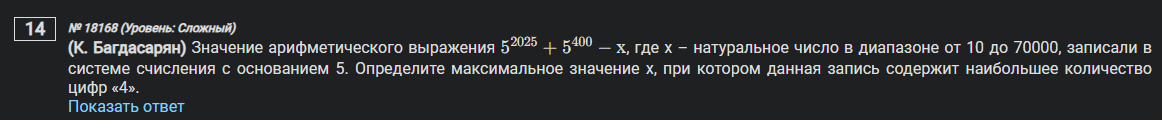

In [81]:
def convert(x):
    s = []
    while x > 0:
        s.append(x % 5)
        x //= 5
    return s
# [1,0,...,0,1,0,...] - x
# [1,0,...,0,0,4,...] - x + 1
# n5 - x = (n5 - 1) - (x - 1)
def minus(l, r):
    for i, (ll, rr) in enumerate(zip(l, r)):
        r[i] = ll - rr
    return r

maxx = -99999999
v = None
n5 = convert(5 ** 2000 + 5 ** 400 - 1)
for x in range(10, 70_000 + 1):
    n = minus(n5.copy(), convert(x - 1))
    n_4 = n.count(4)
    if n_4 >= maxx:
        maxx = n_4
        v = x
print(v)


62501


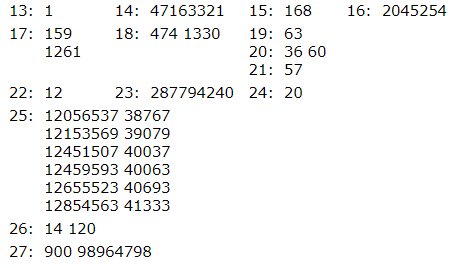

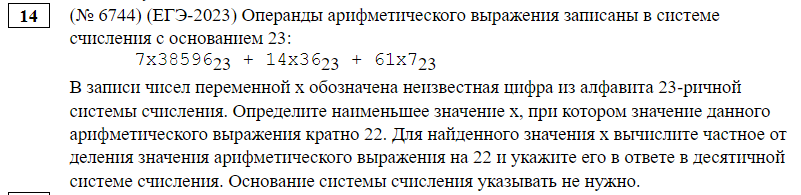

In [21]:
def F(x):
    return sum((23 ** i) * k for i, k in enumerate(reversed(x)))
for x in range(23):
    d, m = divmod(F([7,x,3,8,5,9,6]) + F([1,4,x,3,6]) + F([6,1,x,7]), 22)
    if m == 0:
        print(d)
        print(x)
        break

47163321
0


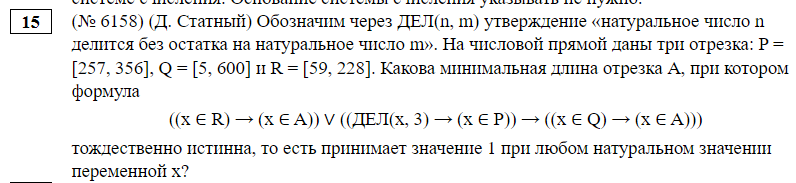

In [29]:
inR = lambda x: 59 <= x <= 228
inQ = lambda x: 5 <= x <= 600
inP = lambda x: 257 <= x <= 356


def F(A1, A2, x):
    inA = lambda x: A1 <= x <= A2
    return (inR(x) <= inA(x)) or (((x % 3 == 0) <= inP(x)) <= (inQ(x) <= inA(x)))


minn = 999999
for A1 in range(500):
    for A2 in range(A1 + 1, 500):
        if all(F(A1, A2, x) for x in range(500)):
            minn = min(minn, A2 - A1)
print(minn)

168


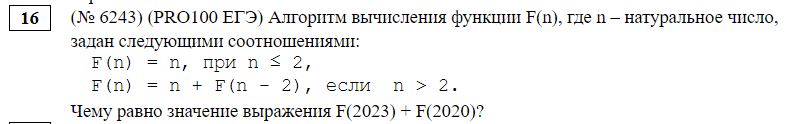

In [43]:
data = {}
def F(n):
    if n not in data:
        data[n] = n + F(n-2) if n > 2 else n
    return data[n]

for n in range(500, 20000, 500):
    F(n)
F(20230) + F(20200)

204343440

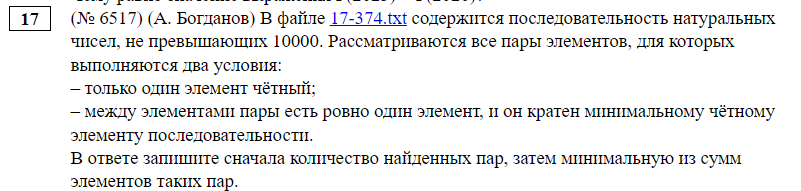

In [61]:
data = [int(x) for x in open('17-374.txt').readlines()]
# data = [17, 14, 3, 6]
# data = [(1, 17), (0, 14), (1, 3), (0, 6)]
x_min = min(data, key=lambda x: (x % 2, x))
counter = 0
sum_min = 999999
for x in range(2, len(data)):
    if (data[x-2] % 2) + (data[x] % 2) == 1 and data[x-1] % x_min == 0:
        counter += 1
        sum_min = min(sum_min, data[x-2] + data[x])


In [62]:
(sum_min, counter)

(1261, 159)

In [56]:
x_min

16

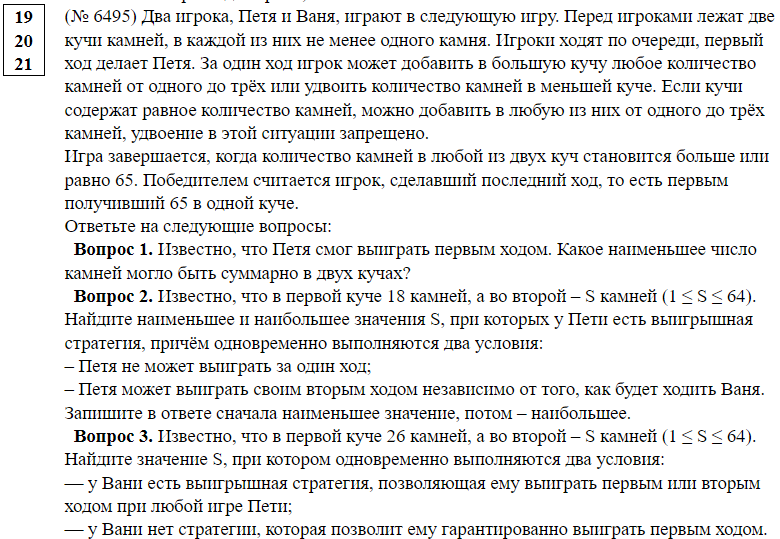

In [ ]:
# (X)(y)
# A:(X+{1,2,3})(y) or B:(X)(y+{1,2,3}) or C:(X)(2y)
# A: X+3=65 => X=62, y=1 => 63
# B: y=62, X>y
# C: y=33, X=34 => 67
#
# (18)(S), 1<=S<=64
# P win on second step
# 

In [62]:
from functools import lru_cache


def generate(k1, k2):
    k1, k2 = min(k1, k2), max(k1, k2)
    for i in range(1, 4):
        yield k1, k2 + i
    if k1 != k2:
        yield k1 * 2, k2


@lru_cache(maxsize=None)
def play(k1, k2, step):
    if k1 >= 65 or k2 >= 65:
        return step - 1
    possible = [play(s1, s2, step + 1) for s1, s2 in generate(k1, k2)]
    res = min(possible, key=lambda x: x if (x - step) % 2 == 0 else 10000 - x)
    # Либо выигрываем сами если (x - step) % 2 == 0 или же максимально долго не даёт выиграть противнику
    return res

In [64]:
for S in range(1, 65):
    if play(26, S, 1) == 4:
        print(S)

57


In [60]:
play(18, 60, 1)

(18, 61) -> [((18, 62), 3), ((18, 63), 3), ((18, 64), 3), ((36, 61), 3)]
(18, 62) -> [((18, 63), 3), ((18, 64), 3), ((18, 65), 2), ((36, 62), 3)]
(18, 63) -> [((18, 64), 3), ((18, 65), 2), ((18, 66), 2), ((36, 63), 3)]
(36, 60) -> [((36, 61), 3), ((36, 62), 3), ((36, 63), 3), ((60, 72), 2)]


3

In [42]:
play(18, 60, 1)

(19, 60) -> [((20, 60), 11), ((21, 60), 11), ((22, 60), 11), ((19, 61), 11), ((19, 62), 3), ((19, 63), 3), ((38, 60), 3)]
(20, 60) -> [((21, 60), 11), ((22, 60), 11), ((23, 60), 10), ((20, 61), 10), ((20, 62), 3), ((20, 63), 3), ((40, 60), 3)]
(21, 60) -> [((22, 60), 11), ((23, 60), 10), ((24, 60), 9), ((21, 61), 9), ((21, 62), 3), ((21, 63), 3), ((42, 60), 3)]
(18, 61) -> [((19, 61), 11), ((20, 61), 10), ((21, 61), 9), ((18, 62), 3), ((18, 63), 3), ((18, 64), 3), ((36, 61), 3)]
(18, 62) -> [((19, 62), 3), ((20, 62), 3), ((21, 62), 3), ((18, 63), 3), ((18, 64), 3), ((18, 65), 2), ((36, 62), 3)]
(18, 63) -> [((19, 63), 3), ((20, 63), 3), ((21, 63), 3), ((18, 64), 3), ((18, 65), 2), ((18, 66), 2), ((36, 63), 3)]
(36, 60) -> [((37, 60), 3), ((38, 60), 3), ((39, 60), 3), ((36, 61), 3), ((36, 62), 3), ((36, 63), 3), ((60, 72), 2)]


11

In [32]:
(18, S) -> () -> [(62,X),(63,X),(64,X)] -> (65, X)
(18, S) -> () -> [(33,X),(63,X),(64,X)] -> (66, X)

ValueError: min() iterable argument is empty

In [ ]:
(18, 31) -> (36, 31) -> (36, 32) -> 